# FORECASTING REAL ESTATE PRICES USING TIME SERIES MODEL
   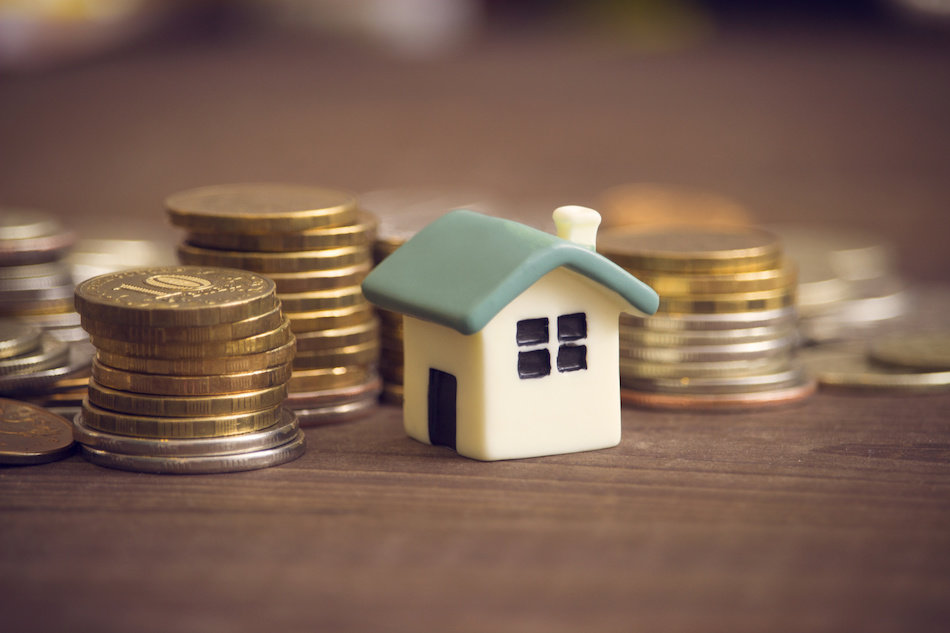

## Table of Contents
1. [Introduction](#introduction)
2. [Business Understanding](#business-understanding)
3. [Problem Statement](#problem-statement)
4. [Main Objective](#main-objective)
5. [Research Questions](#research-questions)
6. [Loading data](#loading-data)
7. [Data Preprocessing](#data-preprocessing)
     i)Calculating ROI and CV
     ii)Checking for outliers
     iii)Handling missing values
8. [Exploratory Data Analysis And Visualization](#exploratory-data-analysis & visualization)
9. [Model Building](#model-building)
10. [Model Interpretation](#model-interpretation)
11. [Conclusion](#conclusion)
15. [Recommendations](#recommendations)


# Introduction




# Business understanding



# Problem statement



# Main objective
The main objective of this project is to design and implement a time series model  that can effectively help forecast real estate prices. **The system will assess various applicant features and financial metrics to determine creditworthiness, allowing financial institutions to make data-driven and well-informed decisions.**



# Research question

1. What are the top 5 best zip codes to invest in?
2. Are the recommendations based on profit margin?


# Step 1: Load the Data

In [98]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf


%matplotlib inline

In [99]:
#load csv file into a DataFrame
df = pd.read_csv('zillow_data.csv')
df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [100]:
df.rename(columns ={'RegionName':'ZipCode'}, inplace=True)
df.head()

,RegionID,ZipCode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [101]:
#getting the top twenty cities based on number of occurence  
cities = df['City'].value_counts().head(10)
cities

City
New York        114
Los Angeles      95
Houston          88
San Antonio      48
Washington       45
Chicago          41
Springfield      40
Austin           40
Las Vegas        38
Philadelphia     38
Name: count, dtype: int64

# Step 2: Data Preprocessing

In [102]:
#calculating the return of investment column and adding it to df 
df['ROI'] = ((df['2018-04'] - df['1996-04']) / df['1996-04'])
df.head()

,RegionID,ZipCode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600,2.083782
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,310000,312500,314100,315000,316600,318100,319600,321100,321800,0.365295
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,320600,320200,320400,320800,321200,321200,323000,326900,329900,0.567966
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000,1.623971
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119400,120000,120300,120300,120300,120300,120500,121000,121500,0.571798


In [103]:
#calculating the coefficient of variance(cv)
#first calculate the mean
df['mean'] = df.loc[:, '1996-04':'2018-04'].mean(skipna=True, axis=1)
# then the standard deviation
df['std'] = df.loc[:, '1996-04': '2018-04'].std(skipna=True, axis=1)
#calculatin the cv column using the mean and std 
df['CV'] = (df['std']/ df['mean'])

In [104]:
df.head()

,RegionID,ZipCode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI,mean,std,CV
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1013300,1018700,1024400,1030700,1033800,1030600,2.083782,743978.867925,190821.103965,0.256487
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,315000,316600,318100,319600,321100,321800,0.365295,219655.849057,33537.101427,0.152680
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,320800,321200,321200,323000,326900,329900,0.567966,262110.566038,37730.794353,0.143950
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1296600,1299000,1302700,1306400,1308500,1307000,1.623971,974139.245283,231225.944628,0.237364
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,120300,120300,120300,120500,121000,121500,0.571798,101875.471698,18167.079218,0.178326


In [105]:
#dropping the mean and std columns
df.drop(columns=['mean','std'], inplace=True)


**CHECKING FOR OUTLIERS**

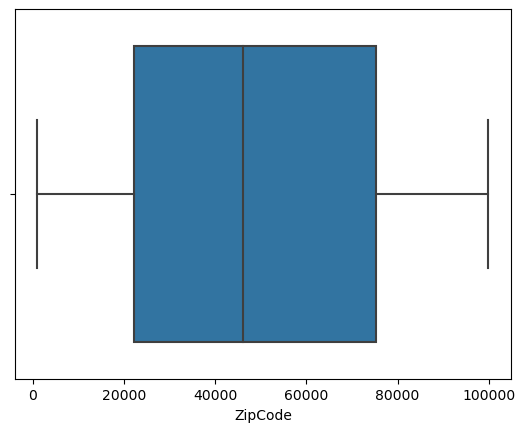

In [106]:
sns.boxplot(x = df['ZipCode']);



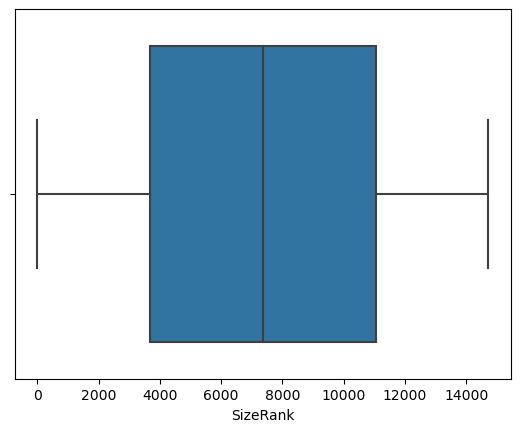

In [107]:
sns.boxplot(x = df['SizeRank']);

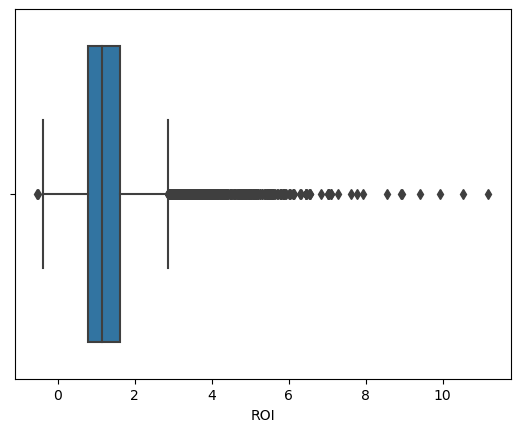

In [108]:
sns.boxplot(x= df['ROI'])
plt.show()

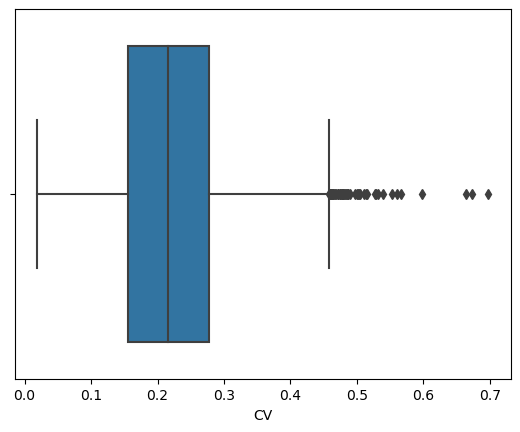

In [109]:
sns.boxplot(x= df['CV'])
plt.show()

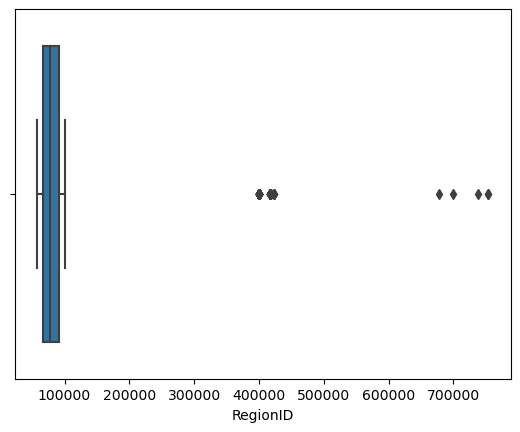

In [110]:
sns.boxplot(x= df['RegionID'])
plt.show()

In [111]:
#creating the outliers list from columns with outliers
columns_with_outliers = ['ROI','CV' ]

#Creating a loop for removing outliers
for col in columns_with_outliers:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    
   # Calculate IQR
    iqr = q3 - q1

  # using a dynamic multiplier instead of using a fixed multiplier eg 1.5
    lower_bound = q1 - (1.5 * iqr * (len(df[col])/(len(df[col]) + 1)))
    upper_bound = q3 + (1.5 * iqr * (len(df[col])/(len(df[col]) + 1)))
    df[col] = df[col][~((df[col] < lower_bound) | (df[col] > upper_bound))]

#Verifying for changes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 274 entries, RegionID to CV
dtypes: float64(221), int64(49), object(4)
memory usage: 30.8+ MB


**HANDLING MISSING VALUES**

In [112]:
#checking for any missing values in the dataset
df.isnull().sum()

RegionID       0
ZipCode        0
City           0
State          0
Metro       1043
            ... 
2018-02        0
2018-03        0
2018-04        0
ROI         1775
CV            53
Length: 274, dtype: int64

In [113]:
#filling the missing values with using 'ffill' method
df.fillna(method='ffill', inplace=True)

In [114]:
#checking if there are more missing values and if they are filled
df.isnull().sum()

RegionID    0
ZipCode     0
City        0
State       0
Metro       0
           ..
2018-02     0
2018-03     0
2018-04     0
ROI         0
CV          0
Length: 274, dtype: int64

#def get_datetimes(df):
    """
     #Takes a dataframem:
    #returns only those column names that can be converted into datetime objects 
    as datetime objects.
    NOTE number of returned columns may not match total number of columns in passed dataframe
   #"""
   date_columns = df.columns[1:]
    
    #datetime_columns = [col for col in date_columns if pd.to_datetime(df[col], format= '%Y-%m', errors='coerce').notna().all()]
    
    #df[datetime_columns] = df[datetime_columns].apply(pd.to_datetime, format='%Y-%m')
    
    #return df


# Step 3: EDA and Visualization

#font = {'family' : 'normal',
        #'weight' : 'bold',
        #'size'   : 22}

#plt.rc('font', **font)

#NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

In [19]:
#selecting the columns to use in eda
eda_df = df[['RegionID','ZipCode','City','State','Metro','CountyName','SizeRank', 'ROI','CV']]
eda_df.head()

,RegionID,ZipCode,City,State,Metro,CountyName,SizeRank,ROI,CV
0,84654,60657,Chicago,IL,Chicago,Cook,1,2.083782,0.256487
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,0.365295,0.152680
2,91982,77494,Katy,TX,Houston,Harris,3,0.567966,0.143950
3,84616,60614,Chicago,IL,Chicago,Cook,4,1.623971,0.237364
4,93144,79936,El Paso,TX,El Paso,El Paso,5,0.571798,0.178326


In [20]:
Numeric_cols = eda_df[['RegionID','ZipCode','SizeRank','ROI','CV']]
Numeric_cols.head()

,RegionID,ZipCode,SizeRank,ROI,CV
0,84654,60657,1,2.083782,0.256487
1,90668,75070,2,0.365295,0.152680
2,91982,77494,3,0.567966,0.143950
3,84616,60614,4,1.623971,0.237364
4,93144,79936,5,0.571798,0.178326


In [22]:
for col in Numeric_cols:
    eda_df.loc[:,col] = pd.to_numeric(eda_df[col])

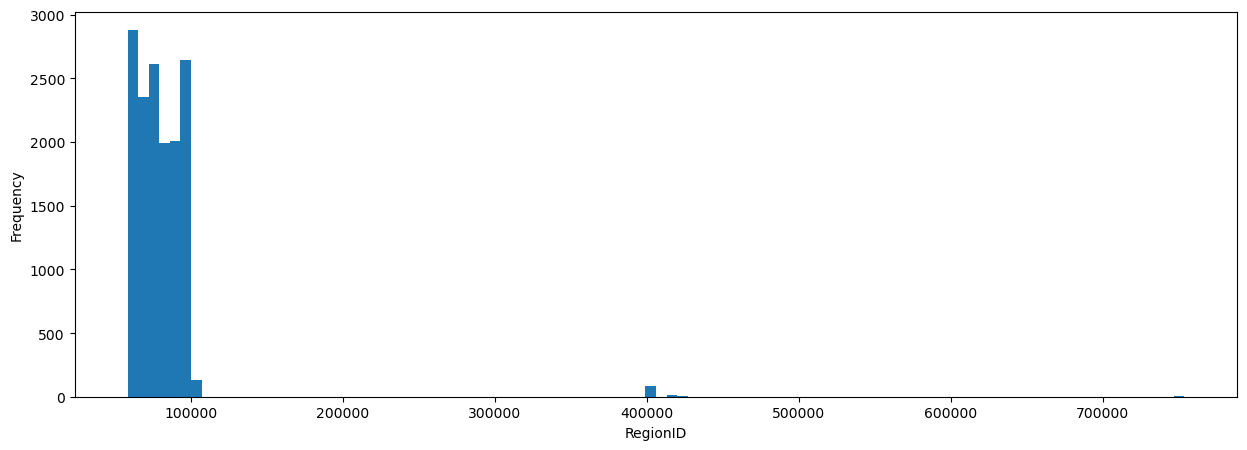

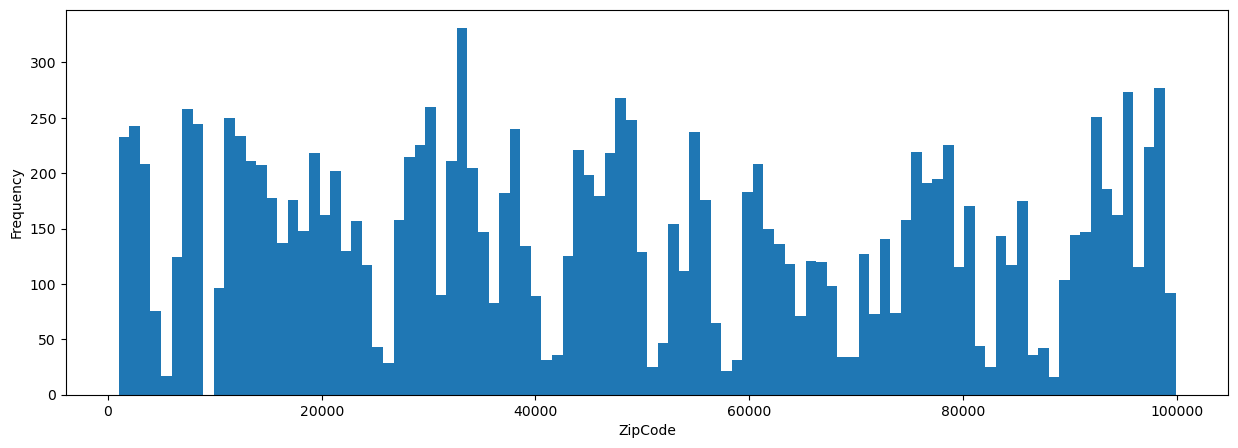

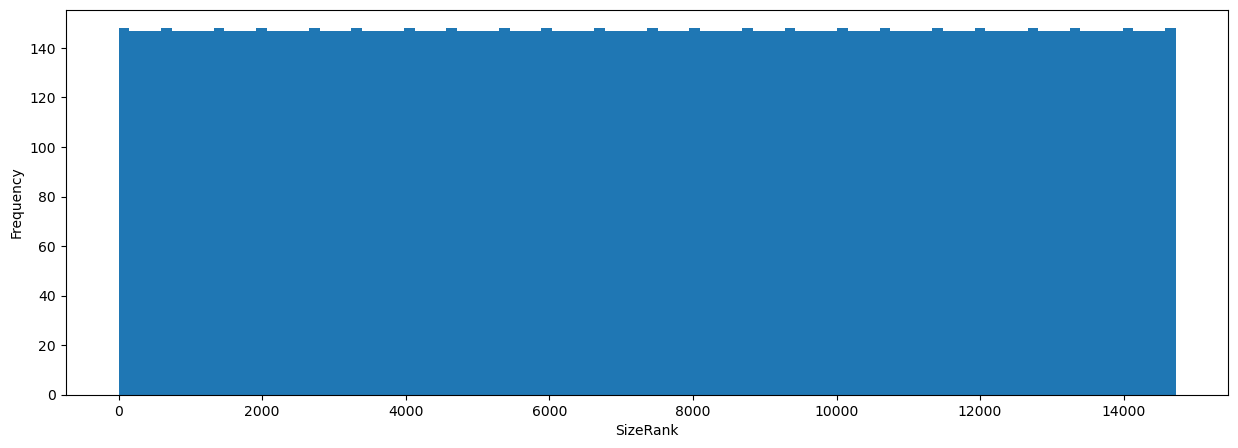

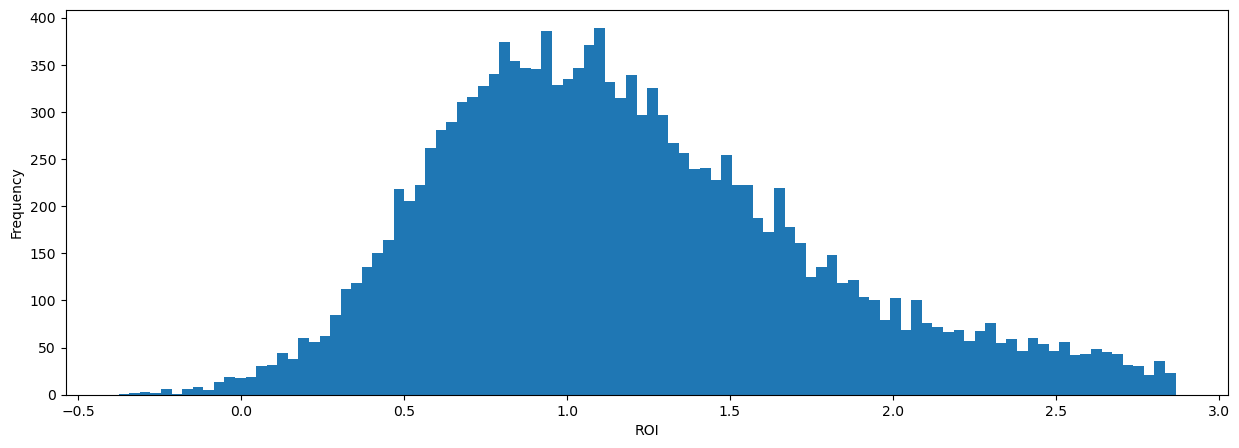

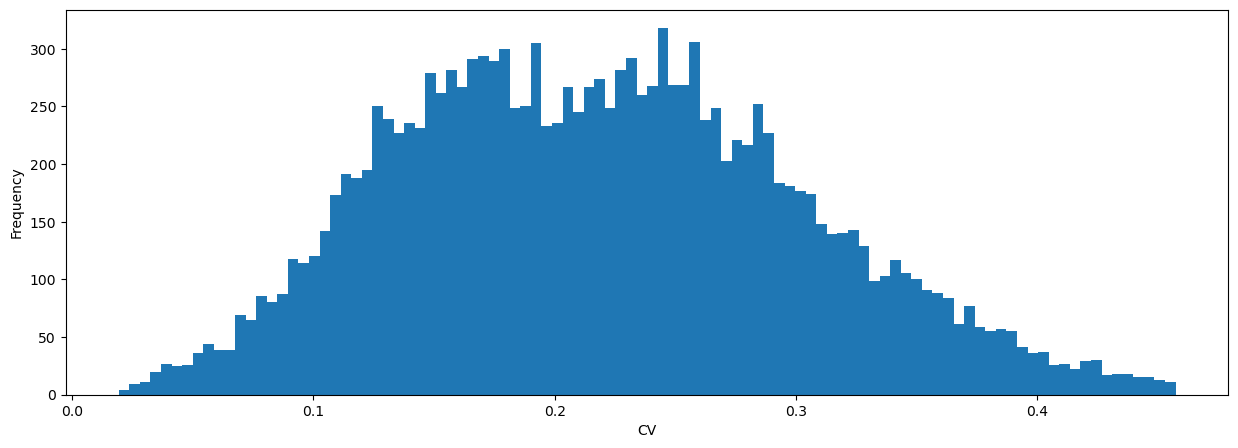

In [26]:
for column in Numeric_cols:
    plt.figure(figsize=(15,5))
    plt.hist(eda_df[column], bins = 100)
    plt.xlabel(column, size=10)
    plt.ylabel('Frequency', size =10)
    plt.show();

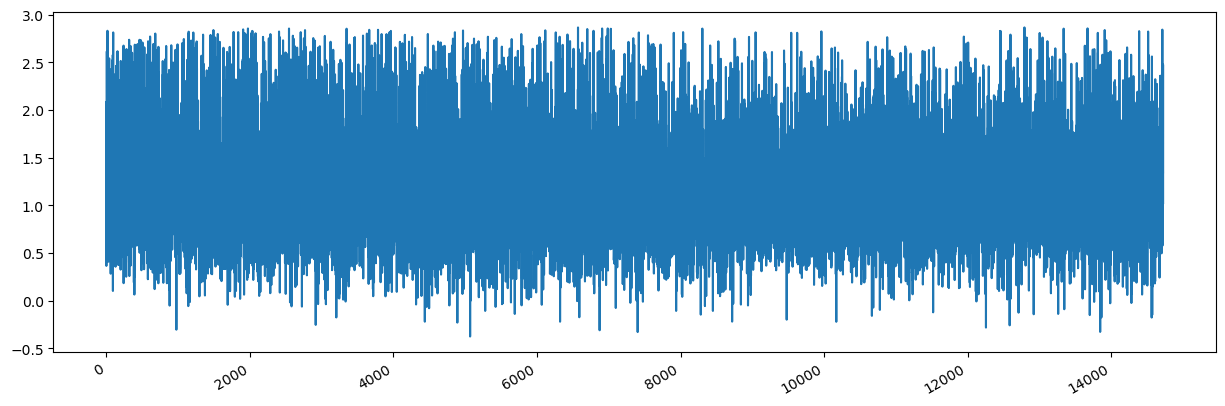

In [27]:
#plot a line graph for ROI column
plt.figure(figsize=(15,5))
plt.plot(eda_df['ROI'])
plt.gcf().autofmt_xdate()


"From the graph above, it is not clear 

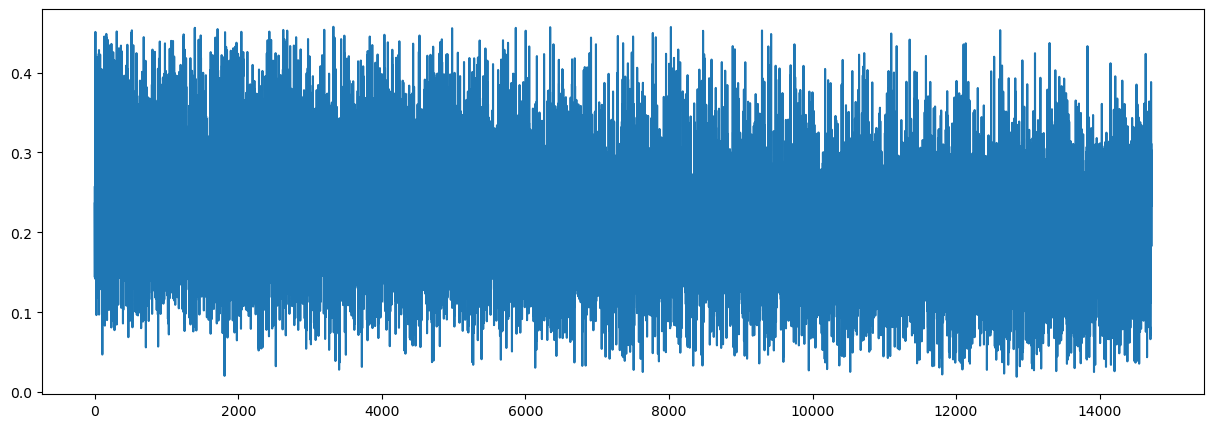

In [28]:
#plot a line graph for ROI column
plt.figure(figsize=(15,5))
plt.plot(eda_df['CV'])
plt.show();

# Step 4: Reshape from Wide to Long Format

In [115]:
def melt_data(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    
    melted = pd.melt(df, id_vars=['ZipCode', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    #melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    #melted = melted.dropna(subset=['value'])
    return melted

In [116]:
#create a copy of df
df = df.copy()
#dropping the roi and cv columns
df.drop(columns=['ROI','CV'], inplace=True)

df.head(20)

,RegionID,ZipCode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
5,91733,77084,Houston,TX,Houston,Harris,6,95000.0,95200.0,95400.0,...,157900,158700,160200,161900,162800,162800,162800,162900,163500,164300
6,61807,10467,New York,NY,New York,Bronx,7,152900.0,152700.0,152600.0,...,394400,400000,407300,411600,413200,414300,413900,411400,413200,417900
7,84640,60640,Chicago,IL,Chicago,Cook,8,216500.0,216700.0,216900.0,...,798000,787100,776100,774900,777900,777900,778500,780500,782800,782800
8,91940,77449,Katy,TX,Houston,Harris,9,95400.0,95600.0,95800.0,...,166800,167400,168400,169600,170900,172300,173300,174200,175400,176200
9,97564,94109,San Francisco,CA,San Francisco,San Francisco,10,766000.0,771100.0,776500.0,...,3767700,3763900,3775000,3799700,3793900,3778700,3770800,3763100,3779800,3813500


In [118]:
melt_df = melt_data(df)
melt_df

,ZipCode,RegionID,SizeRank,City,State,Metro,CountyName,time,value
0,60657,84654,1,Chicago,IL,Chicago,Cook,1996-04,334200.0
1,75070,90668,2,McKinney,TX,Dallas-Fort Worth,Collin,1996-04,235700.0
2,77494,91982,3,Katy,TX,Houston,Harris,1996-04,210400.0
3,60614,84616,4,Chicago,IL,Chicago,Cook,1996-04,498100.0
4,79936,93144,5,El Paso,TX,El Paso,El Paso,1996-04,77300.0
...,...,...,...,...,...,...,...,...,...
3901590,1338,58333,14719,Ashfield,MA,Greenfield Town,Franklin,2018-04,209300.0
3901591,3293,59107,14720,Woodstock,NH,Claremont,Grafton,2018-04,225800.0
3901592,40404,75672,14721,Berea,KY,Richmond,Madison,2018-04,133400.0
3901593,81225,93733,14722,Mount Crested Butte,CO,Richmond,Gunnison,2018-04,664400.0


In [119]:
melt_df['time'] = pd.to_datetime(melt_df['time'], format='%Y-%m')
melt_df

,ZipCode,RegionID,SizeRank,City,State,Metro,CountyName,time,value
0,60657,84654,1,Chicago,IL,Chicago,Cook,1996-04-01,334200.0
1,75070,90668,2,McKinney,TX,Dallas-Fort Worth,Collin,1996-04-01,235700.0
2,77494,91982,3,Katy,TX,Houston,Harris,1996-04-01,210400.0
3,60614,84616,4,Chicago,IL,Chicago,Cook,1996-04-01,498100.0
4,79936,93144,5,El Paso,TX,El Paso,El Paso,1996-04-01,77300.0
...,...,...,...,...,...,...,...,...,...
3901590,1338,58333,14719,Ashfield,MA,Greenfield Town,Franklin,2018-04-01,209300.0
3901591,3293,59107,14720,Woodstock,NH,Claremont,Grafton,2018-04-01,225800.0
3901592,40404,75672,14721,Berea,KY,Richmond,Madison,2018-04-01,133400.0
3901593,81225,93733,14722,Mount Crested Butte,CO,Richmond,Gunnison,2018-04-01,664400.0


In [120]:
#checking for any missing value after convertion to long format
melt_df.isnull().sum()

ZipCode       0
RegionID      0
SizeRank      0
City          0
State         0
Metro         0
CountyName    0
time          0
value         0
dtype: int64

In [121]:
#checking if time column is datatime dtype
melt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3901595 entries, 0 to 3901594
Data columns (total 9 columns):
 #   Column      Dtype         
---  ------      -----         
 0   ZipCode     int64         
 1   RegionID    int64         
 2   SizeRank    int64         
 3   City        object        
 4   State       object        
 5   Metro       object        
 6   CountyName  object        
 7   time        datetime64[ns]
 8   value       float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 267.9+ MB


In [122]:
zipcode_grouped = melt_df.groupby('ZipCode').aggregate({'time':'max'}) - melt_df.groupby('ZipCode').aggregate({'time':'min'})
zipcode_grouped

,time
ZipCode,
1001,8035 days
1002,8035 days
1005,8035 days
1007,8035 days
1008,8035 days
...,...
99709,8035 days
99712,8035 days
99801,8035 days


In [124]:
# Group the melted DataFrame by 'RegionID'
grouped = melt_df.groupby('ZipCode')

# Create a dictionary to store mini DataFrames
mini_dataframes = {}

# Iterate through the groups and create mini DataFrames
for region_id, group_df in grouped:
    mini_dataframes[region_id] = group_df

In [127]:
melt_df_1 = mini_dataframes[1001]
melt_df_1

,ZipCode,RegionID,SizeRank,City,State,Metro,CountyName,time,value
5850,1001,58196,5851,Agawam,MA,Springfield,Hampden,1996-04-01,113100.0
20573,1001,58196,5851,Agawam,MA,Springfield,Hampden,1996-05-01,112800.0
35296,1001,58196,5851,Agawam,MA,Springfield,Hampden,1996-06-01,112600.0
50019,1001,58196,5851,Agawam,MA,Springfield,Hampden,1996-07-01,112300.0
64742,1001,58196,5851,Agawam,MA,Springfield,Hampden,1996-08-01,112100.0
...,...,...,...,...,...,...,...,...,...
3833830,1001,58196,5851,Agawam,MA,Springfield,Hampden,2017-12-01,221700.0
3848553,1001,58196,5851,Agawam,MA,Springfield,Hampden,2018-01-01,221700.0
3863276,1001,58196,5851,Agawam,MA,Springfield,Hampden,2018-02-01,221700.0
3877999,1001,58196,5851,Agawam,MA,Springfield,Hampden,2018-03-01,222700.0


In [130]:
#setting time as index
melt_df_1.set_index('time', inplace=True)

melt_df_1.head(20)

,ZipCode,RegionID,SizeRank,City,State,Metro,CountyName,value
time,,,,,,,,
1996-04-01,1001,58196,5851,Agawam,MA,Springfield,Hampden,113100.0
1996-05-01,1001,58196,5851,Agawam,MA,Springfield,Hampden,112800.0
1996-06-01,1001,58196,5851,Agawam,MA,Springfield,Hampden,112600.0
1996-07-01,1001,58196,5851,Agawam,MA,Springfield,Hampden,112300.0
1996-08-01,1001,58196,5851,Agawam,MA,Springfield,Hampden,112100.0
1996-09-01,1001,58196,5851,Agawam,MA,Springfield,Hampden,111900.0
1996-10-01,1001,58196,5851,Agawam,MA,Springfield,Hampden,111800.0
1996-11-01,1001,58196,5851,Agawam,MA,Springfield,Hampden,111700.0
1996-12-01,1001,58196,5851,Agawam,MA,Springfield,Hampden,111700.0


In [131]:
value_df = melt_df_1['value']
value_df

time
1996-04-01    113100.0
1996-05-01    112800.0
1996-06-01    112600.0
1996-07-01    112300.0
1996-08-01    112100.0
                ...   
2017-12-01    221700.0
2018-01-01    221700.0
2018-02-01    221700.0
2018-03-01    222700.0
2018-04-01    223600.0
Name: value, Length: 265, dtype: float64

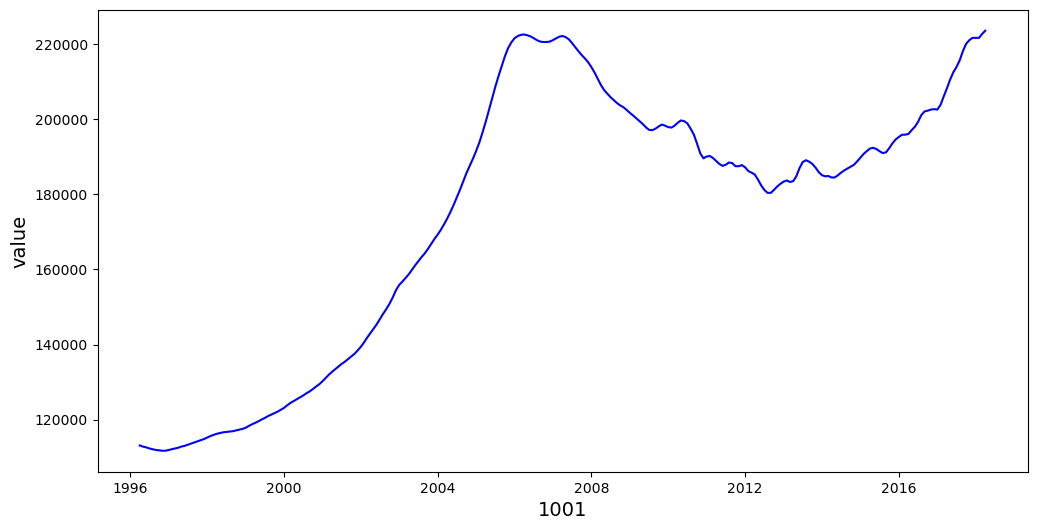

In [133]:
fig = plt.figure(figsize=(12,6))
plt.plot(value_df, color='blue')
plt.xlabel(melt_df_1.iloc[1]['ZipCode'], fontsize=14)
plt.ylabel('value', fontsize=14)
plt.show()

From the graph above we see that the time series graph is not stationary due to the upward linear trend shown.

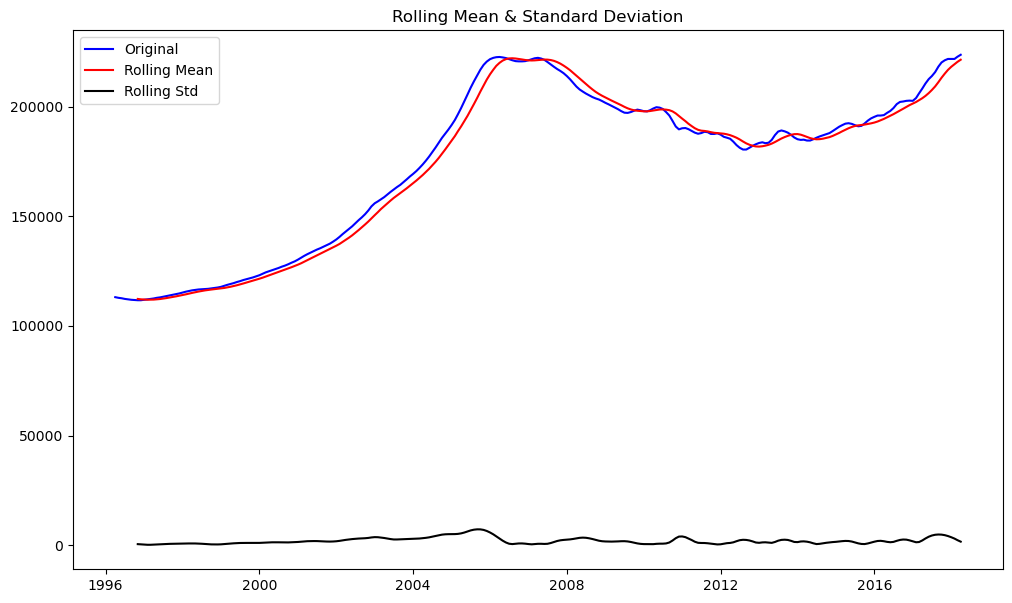

In [140]:
roll_mean = value_df.rolling(window=8, center=False).mean()
roll_std = value_df.rolling(window=8, center=False).std()

fig = plt.figure(figsize=(12,7))
plt.plot(value_df, color='blue', label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

## Differentiating 

In [144]:
value_diff = value_df.diff().dropna()
value_diff

time
1996-05-01    -300.0
1996-06-01    -200.0
1996-07-01    -300.0
1996-08-01    -200.0
1996-09-01    -200.0
               ...  
2017-12-01     600.0
2018-01-01       0.0
2018-02-01       0.0
2018-03-01    1000.0
2018-04-01     900.0
Name: value, Length: 264, dtype: float64

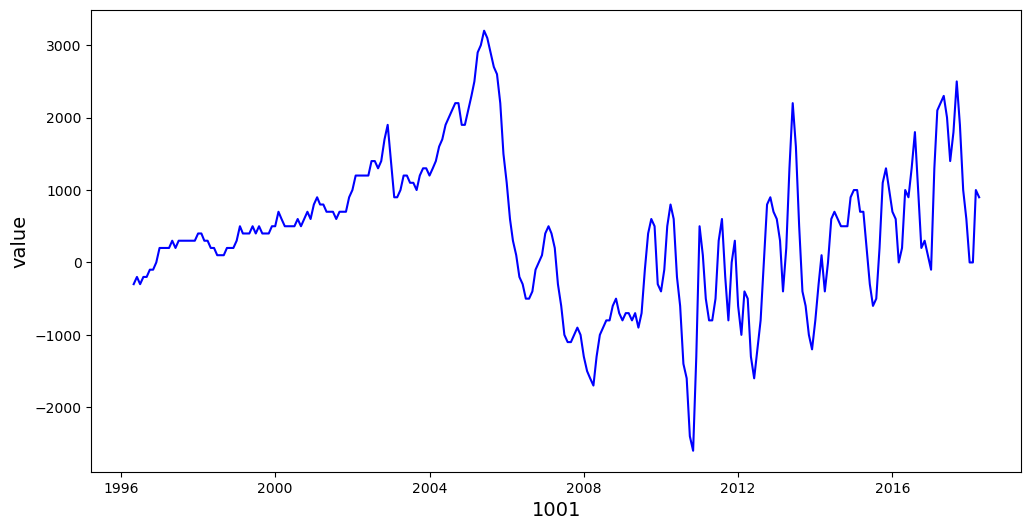

In [146]:
fig = plt.figure(figsize=(12,6))
plt.plot(value_diff, color='blue')
plt.xlabel(melt_df_1.iloc[1]['ZipCode'], fontsize=14)
plt.ylabel('value', fontsize=14)
plt.show()

## Perform the Dickey Fuller test


In [149]:
#initiate adfuller function with value_diff parameter
dftest = adfuller(value_diff)

# Print Dickey-Fuller test results
print('Results of Dickey-Fuller Test: \n')
print(dftest)

Results of Dickey-Fuller Test: 

(-1.945352547003753, 0.3110356104138351, 12, 251, {'1%': -3.4566744514553016, '5%': -2.8731248767783426, '10%': -2.5729436702592023}, 3552.048382789642)


In [150]:
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])

print(dfoutput)

Test Statistic                  -1.945353
p-value                          0.311036
#Lags Used                      12.000000
Number of Observations Used    251.000000
dtype: float64


## Plotting Autocorrelation and Partial Correlation Graphs

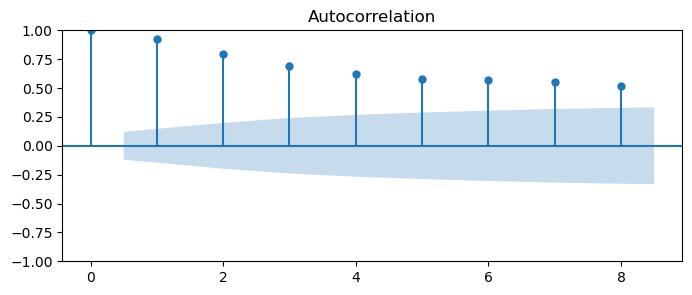

In [152]:
# Plot the ACF

fig, ax = plt.subplots(figsize=(8, 3))
plot_acf(value_diff, ax=ax, lags=8);

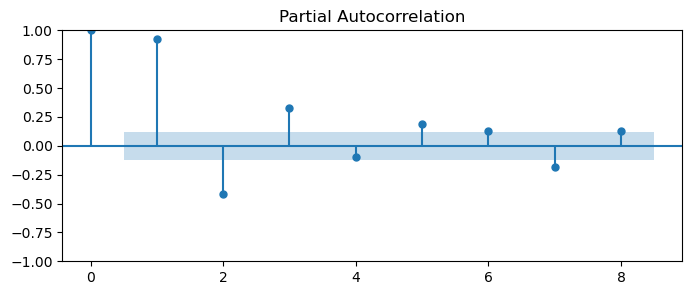

In [153]:
# Plot the PACF

fig, ax = plt.subplots(figsize=(8, 3))
plot_pacf(value_diff, ax=ax, lags=8, method="ywm");

# Step 5: ARIMA Modeling

## ARMA model 1

In [155]:
#initiating ARIMA(1,0) model with value differencing and order parameter
arma = ARIMA(value_diff, order=(1, 0, 0))
#fit the model
res_arma = arma.fit()


C:\Users\Lynn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lynn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lynn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [156]:
print(res_arma.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  264
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1942.902
Date:                Sun, 17 Sep 2023   AIC                           3891.804
Time:                        02:57:18   BIC                           3902.532
Sample:                    05-01-1996   HQIC                          3896.115
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        418.5606    308.199      1.358      0.174    -185.498    1022.619
ar.L1          0.9234      0.021     43.051      0.000       0.881       0.965
sigma2      1.437e+05   9374.772     15.330      0.0

## ARMA Model 2

In [157]:
# Fit an ARMA(2,1) model
arma_2 = ARIMA(value_diff, order=(2, 0, 1))
res_arma = arma_2.fit()

# Print out summary information on the fit
print(res_arma.summary())

C:\Users\Lynn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lynn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lynn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  264
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -1900.746
Date:                Sun, 17 Sep 2023   AIC                           3811.492
Time:                        03:00:04   BIC                           3829.372
Sample:                    05-01-1996   HQIC                          3818.677
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        418.5605    226.918      1.845      0.065     -26.191     863.313
ar.L1          0.9601      0.065     14.707      0.000       0.832       1.088
ar.L2         -0.1010      0.067     -1.501      0.1

## ARMA 3

In [159]:
# Fit an ARMA(2,2) model
arma_3 = ARIMA(value_diff, order=(2, 0, 2))
res_arma = arma_3.fit()

# Print out summary information on the fit
print(res_arma.summary())

C:\Users\Lynn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lynn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lynn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  264
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -1900.071
Date:                Sun, 17 Sep 2023   AIC                           3812.142
Time:                        03:03:26   BIC                           3833.598
Sample:                    05-01-1996   HQIC                          3820.764
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        418.5569    385.948      1.084      0.278    -337.887    1175.001
ar.L1          1.6903      0.157     10.759      0.000       1.382       1.998
ar.L2         -0.7012      0.141     -4.963      0.0

# Step 6: Interpreting Results